# Finding trends of publishers, their content is unique or similar to another publisher, if yes then which?

In [20]:
#import libraries
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
#uploading dataset
cluster_data = pd.read_csv('cop26_clust_noun.csv')
print(len(cluster_data))
cluster_data.head(2)

87638


,id,url,og_url,domain,title,description,content,entities,authors,paywall,...,cat_score,outbound_link_ids,inbound_link_ids,tagss,Nounss,title_clean,pub_day,pub_hour,Nounss_clean,cluster_id
0,KQe1r321ZaJY,https://www.abcnyheter.no/nyheter/norge/2021/1...,https://www.abcnyheter.no/a/195798411/,www.abcnyheter.no,Færre vil møte klimakrisen med tiltak som i ko...,Andelen som vil ha like kraftige tiltak mot kl...,"Samtidig som klimatoppmøtet i Glasgow starter,...","['Glasgow', 'Fokus', 'Norge', 'Klimatoppmøtet'...",NaN,NaN,...,0.963856,NaN,NaN,[],"['Færre', 'klimakrisen', 'tiltak', 'koronapand...",færr klimakris tiltak koronapandemi,2021-10-31,23,færr klimakris tiltak koronapandemi,304_1940
1,jnegLMrLkawZ,https://www.ao.no/oslo-fergenes-siste-dag-pa-f...,https://www.ao.no/5-128-204411,www.ao.no,(+) Oslo-Fergenes siste dag på fjorden: – Det ...,Siden 1917 har Oslo-Fergene fraktet turister o...,"Øyene, Ferger | Oslo-Fergenes siste dag på fjo...",NaN,['Sevda Barazesh'],1.0,...,NaN,NaN,['LDdwm7PORa1Y'],[],"['Oslo-Fergenes', 'dag', 'fjorden']",oslo ferg dag fjord,2021-10-31,23,oslo ferg dag fjord,304_1097


### Sorting top ten domain according to publish date

In [22]:
#making list of top 10 domains
list_of_values = ["www.nrk.no",
        "www.nettavisen.no",
        "www.adressa.no",
        "www.tv2.no",
        "www.smp.no",
        "www.ht.no",
        "www.itromso.no",
        "www.rbnett.no",
        "www.folkebladet.no",
        "www.framtidinord.no"]               

In [23]:
top_10_websites = cluster_data[cluster_data['domain'].isin(list_of_values)]

In [24]:
top_10_websites = top_10_websites[['domain','cluster_id','pub_day']]
top_10_websites["pub_day"] = pd.to_datetime(top_10_websites["pub_day"])

top_10_websites = top_10_websites.sort_values(by="pub_day")
top_10_websites.columns

Index(['domain', 'cluster_id', 'pub_day'], dtype='object')

In [25]:
top_10_websites.head()

,domain,cluster_id,pub_day
5,www.nrk.no,304_475,2021-10-31
2884,www.nettavisen.no,304_38,2021-10-31
2885,www.adressa.no,304_200,2021-10-31
2886,www.framtidinord.no,304_200,2021-10-31
2887,www.folkebladet.no,304_200,2021-10-31


In [26]:
def get_domain(x):
  if x.startswith('www.'):
    return x[4:-3]
  else:
    return x[:-3]

In [27]:
top_10_websites['domain'] = top_10_websites['domain'].apply(get_domain)
top_10_websites['domain'].head()

5                nrk
2884      nettavisen
2885         adressa
2886    framtidinord
2887     folkebladet
Name: domain, dtype: object

### Assigning labels to each article whether unique or not

In [28]:
#nested loop to compare each article with others
top_10_websites['Status_of_article'] ='unique' 
for i in range(len(top_10_websites)):
  for j in range(i+1,len(top_10_websites)):
    if top_10_websites['cluster_id'].iloc[i]==top_10_websites['cluster_id'].iloc[j] and top_10_websites['domain'].iloc[i]!=top_10_websites['domain'].iloc[j]  :
      top_10_websites['Status_of_article'].iloc[j] = "Similar from"+" "+ str(top_10_websites['domain'].iloc[i])


/Users/nimrarana/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [29]:
top_10_websites.tail(10)

,domain,cluster_id,pub_day,Status_of_article
84335,folkebladet,317_338,2021-11-13,Similar from smp
84333,framtidinord,317_338,2021-11-13,Similar from folkebladet
84331,itromso,317_338,2021-11-13,Similar from framtidinord
84330,ht,317_338,2021-11-13,Similar from itromso
84329,adressa,317_338,2021-11-13,Similar from ht
84328,nrk,317_1725,2021-11-13,unique
84313,adressa,317_574,2021-11-13,unique
84310,folkebladet,317_818,2021-11-13,Similar from rbnett
84334,tv2,317_44,2021-11-13,unique
87618,folkebladet,317_109,2021-11-13,unique


In [34]:
top_10_websites.groupby("Status_of_article").size()

Status_of_article
Similar from adressa         1493
Similar from folkebladet     1336
Similar from framtidinord    1321
Similar from ht              1336
Similar from itromso         1336
Similar from nettavisen      1046
Similar from nrk              848
Similar from rbnett          1314
Similar from smp             1350
Similar from tv2              423
unique                       9934
dtype: int64

### Visualizing frequency of articles whether unique or not 

In [31]:
def assign_duplicates(content):
  if content=='unique':
    return "unique"
  else:
    return "Similar"

In [33]:
top_10_websites['is_unique'] = top_10_websites['Status_of_article'].apply(assign_duplicates)

<AxesSubplot:title={'center':'Content of top 10 publisher, uniquie or similar from other publishers'}, xlabel='count', ylabel='domain'>

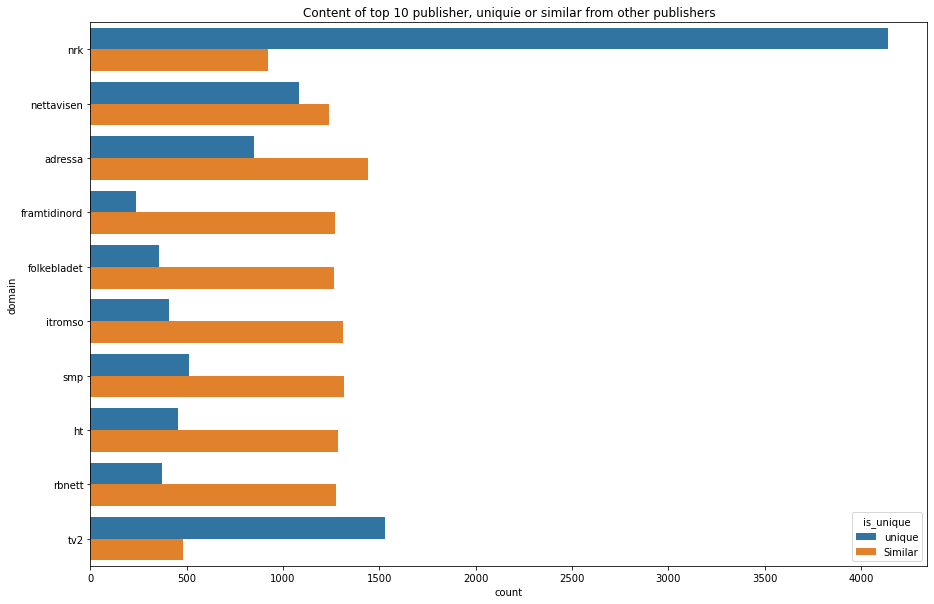

In [41]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Content of top 10 publisher, uniquie or similar from other publishers')
sns.countplot(y='domain', hue = "is_unique", data = top_10_websites)

### Visualizing articles of top 10 publisher, uniquie or similar from other publishers, if yes then which

<AxesSubplot:title={'center':'Content of top 10 publisher, uniquie or similar from other publishers, if yes then which'}, xlabel='count', ylabel='domain'>

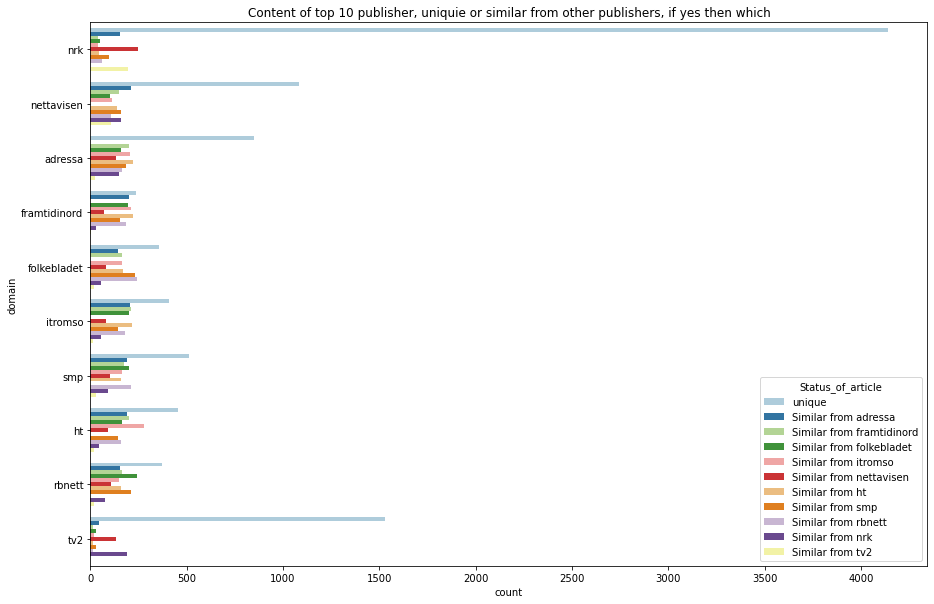

In [36]:
 fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Content of top 10 publisher, uniquie or similar from other publishers, if yes then which')
sns.countplot(y='domain', hue = "Status_of_article", data = top_10_websites,palette = sns.color_palette("Paired"))